# Benchmark Dynamic network libraries

tests on dynetx and tg lib

## TGLIB


In [4]:
# import tglib as tgl  # tglib
import scipy.stats as ss  # for Kendall's tau correlation
from tqdm import tqdm
import time
import numpy as np
import random
from fix_format import FixFormat
# from benchmark_tglib import testname as btgl

folder = "C:/Users/dries/Documents/GitHub/Code/Data/"

files_x_s_t_ts = ['enron', 'wikipedia', 'reddit', 'SocialEvo', 'Flights', 'UNvote', 'lastfm']
files_s_t_ts = ['CanParl']
files_ts_s_t  = ['tgbl-review']
files = files_s_t_ts + files_x_s_t_ts + files_ts_s_t
# num nodes =  {'enron': 3125, 'SocialEvo': 4486, 'CanParl': 51331, 'tgbl-wiki': 18257, 'wikipedia': 18257, 'UNvote': 31516, 'reddit': 78516, 
#  'lastfm': 154993, 'Flights': 395072, 'tgbl-review': 4730223}

files = ['enron', 'SocialEvo', 'wikipedia', 'UNvote', 'CanParl', 'reddit',  'lastfm', 'Flights', 'tgbl-review']
print(files)
inExt = '.csv'
outExt = '.txt'

if False: # True:
    for file in files_x_s_t_ts:
        print('\n'+file)
        FixFormat.x_s_t_ts(folder, file, inExt, outExt)
    for file in files_s_t_ts:
        print('\n'+file)
        FixFormat.s_t_ts(folder, file, inExt, outExt)
    FixFormat.ts_s_t(folder, 'tgbl-review', inExt, outExt)
        
doCalcs = False
do_paths = False

size_big = 10
size_smol = 10

# wiki_path = "../Code/Data/tgbl-wiki.txt"
# review_path = "../Code/Data/tgbl-review_edgelist_final.txt"
# wiki_path_h = "../Code/Data/tgbl-wiki_edgelist_final_h.txt"
# review_path_h = "../Code/Data/tgbl-review_edgelist_final_h.txt"



# stats_time_results

['enron', 'SocialEvo', 'wikipedia', 'UNvote', 'CanParl', 'reddit', 'lastfm', 'Flights', 'tgbl-review']


In [5]:
load_time_results = {}
load_time_results['tglib'] = {}
load_time_results['dynetx'] = {}
load_time_results['raphtory'] = {}

stats_time_results = {}
stats_time_results['tglib'] = {}
stats_time_results['dynetx'] = {}
stats_time_results['raphtory'] = {}

path_time_results = {}
path_time_results['tglib'] = {}
path_time_results['dynetx'] = {}
path_time_results['raphtory'] = {}

cc_time = {}
cc_time['tglib'] = {}
cc_time['dynetx'] = {}
cc_time['raphtory'] = {}

pr_time = {}
pr_time['tglib'] = {}
pr_time['dynetx'] = {}
pr_time['raphtory'] = {}

num_nodes = {}
num_edges = {}
num_incidents ={}

density = {}

incidents = {}

In [6]:
from benchmark_tglib import TGBLibBenchmark

if doCalcs:
    for file in files:    
        path = folder+file+'.txt'
        print(path)
        res = TGBLibBenchmark.do_benchmark(path, size_smol, do_paths=do_paths)
        # print(res)

        load_time_results ['tglib'][file] = 0  if not "loadTime" in res.keys() else  res["loadTime"]
        stats_time_results ['tglib'][file] = 0  if not "stats" in res.keys() else  res["stats"]
        path_time_results ['tglib'][file] = 0  if not "paths" in res.keys() else  res["paths"]
        cc_time['tglib'][file] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
        pr_time['tglib'][file] = 0  if not "pagerank" in res.keys() else  res["pagerank"]
        incidents[file] = res["to_incidents"]

        print("====================================\n")

../../Code/Data/enron.txt
Time taken to read graph 0.2409977912902832 seconds
Time taken to get stats 0.02299976348876953 seconds 

Time to get clustering coefficient: 0.04903006553649902
Time to get Pagerank: 0.0010006427764892578

../../Code/Data/SocialEvo.txt
Time taken to read graph 3.8869616985321045 seconds
Time taken to get stats 0.48000502586364746 seconds 

Time to get clustering coefficient: 2.727001190185547
Time to get Pagerank: 0.016999006271362305

../../Code/Data/wikipedia.txt
Time taken to read graph 0.3070385456085205 seconds
Time taken to get stats 0.08096528053283691 seconds 

Time to get clustering coefficient: 0.005017518997192383
Time to get Pagerank: 0.0009965896606445312

../../Code/Data/UNvote.txt
Time taken to read graph 2.038013458251953 seconds
Time taken to get stats 0.11799335479736328 seconds 

Time to get clustering coefficient: 4.703062057495117
Time to get Pagerank: 0.010000467300415039

../../Code/Data/CanParl.txt
Time taken to read graph 0.1639983654

In [7]:
# inPath = './datasets/tgbl-wiki.txt'

# from benchmark_tglib import TGBLibBenchmark

# res = TGBLibBenchmark.do_benchmark(wiki_path, size_smol, do_paths=False)
# # print(res)

# load_time_results ['tglib']['review'] = 0  if not "loadTime" in res.keys() else  res["loadTime"]
# stats_time_results ['tglib']['review'] = 0  if not "stats" in res.keys() else  res["stats"]
# path_time_results ['tglib']['review'] = 0  if not "paths" in res.keys() else  res["paths"]
# cc_time['tglib']['review'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
# pr_time['tglib']['review'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

In [8]:
# inPath = './datasets/tgbl-review_edgelist_final_with_intervals.txt'


## DynetX

In [9]:
from tqdm import tqdm
import numpy as np

import dynetx.dynetx as dn
import dynetx.dynetx.algorithms as al
import time
import functools 
from  benchmark_DyNetX import BenchmarkDyNetX as bdyn

In [10]:

if doCalcs:
    for file in files:
        path = folder+file+'.txt'
        print(path)
        res = bdyn.do_benchmark(path, size_big, do_paths=do_paths)
        load_time_results ['dynetx'][file] = 0 if not "loadTime" in res.keys() else  res["loadTime"]
        stats_time_results ['dynetx'][file] = 0 if not "stats" in res.keys() else  res["stats"]
        path_time_results ['dynetx'][file] = 0 if not "paths" in res.keys() else  res["paths"]
        cc_time['dynetx'][file] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
        pr_time['dynetx'][file] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

../../Code/Data/enron.txt
Time taken to read graph 0.9812400341033936 seconds
Time taken to get stats 0.00500035285949707 seconds
===========stats===========
num_Nodes:  184
num_edges:  3125
number of interactions:  1751
number of timestamps:  22632
min. timestamps:  0
max. timestamps:  113740399
min in degree:  1
max in degree:  61
min out degree:  0
max out degree:  101
../../Code/Data/SocialEvo.txt
Time taken to read graph 17.261016607284546 seconds
Time taken to get stats 0.05603933334350586 seconds
===========stats===========
num_Nodes:  74
num_edges:  4486
number of interactions:  2225
number of timestamps:  565932
min. timestamps:  0
max. timestamps:  20935623
min in degree:  0
max in degree:  73
min out degree:  22
max out degree:  70
../../Code/Data/wikipedia.txt
Time taken to read graph 1.1659984588623047 seconds
Time taken to get stats 0.04403948783874512 seconds
===========stats===========
num_Nodes:  9227
num_edges:  18257
number of interactions:  5523
number of timestamps

In [11]:
['CanParl', 'enron', 'tgbl-wiki', 'wikipedia', 'reddit', 'SocialEvo', 'Flights', 'UNvote', 'lastfm', 'tgbl-review']

# for file in ['CanParl', 'enron', 'tgbl-wiki', 'wikipedia', 'reddit']:
#     path = folder+file+'.txt'
#     print(path)
#     res = bdyn.do_benchmark(path, size_big, do_paths=True)
#     path_time_results['dynetx'][file] = 0 if not "paths" in res.keys() else res["paths"]
#     load_time_results['dynetx'][file] = 0 if not "loadTime" in res.keys() else res["loadTime"]
#     stats_time_results['dynetx'][file] = 0 if not "stats" in res.keys() else res["stats"]
#     path_time_results['dynetx'][file] = 0
#     cc_time['dynetx'][file] = 0  if not "clusteringCoefficient" in res.keys() else res["clusteringCoefficient"]
#     pr_time['dynetx'][file] = 0  if not "pagerank" in res.keys() else  res["pagerank"]


['CanParl',
 'enron',
 'tgbl-wiki',
 'wikipedia',
 'reddit',
 'SocialEvo',
 'Flights',
 'UNvote',
 'lastfm',
 'tgbl-review']

In [12]:
# res = bdyn.do_benchmark(review_path, size_big)
# load_time_results ['dynetx']['review'] = 0 if not "loadTime" in res.keys() else  res["loadTime"]
# stats_time_results ['dynetx']['review'] = 0 if not "stats" in res.keys() else  res["stats"]
# path_time_results ['dynetx']['review'] = 0 if not "paths" in res.keys() else  res["paths"]
# cc_time['dynetx']['review'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
# pr_time['dynetx']['review'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]

In [13]:
# inPath = './datasets/tgbl-review_edgelist_final_with_intervals.txt'
# bdyn.do_benchmark(inPath, size_smol)

## Raphtory


In [14]:
from benchmark_raphtory import BenchmarkRaphtory  as br

In [15]:
if doCalcs:
    for file in files:
        path = folder+file+'_h.txt'
        res = br.do_benchmark(path)
        load_time_results ['raphtory'][file] = 0 if not "loadTime" in res.keys() else res["loadTime"]
        stats_time_results ['raphtory'][file] = 0 if not "stats" in res.keys() else res["stats"]
        path_time_results ['raphtory'][file] = 0 if not "paths" in res.keys() else res["paths"]
        cc_time['raphtory'][file] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
        pr_time['raphtory'][file] = 0  if not "pagerank" in res.keys() else  res["pagerank"]
        density[file] = res["density"]
        num_nodes[file] = res["num_nodes"]
        num_edges[file] = res["num_edges"]
        num_incidents[file] = res["num_incidents"]
        print(res)

Time to read pandas from file: 0.07


Time to load graph from pandas: 0.1380023956298828


AttributeError: 'builtins.Graph' object has no attribute 'count_nodes'

In [ ]:
# res = br.do_benchmark(review_path_h)
# load_time_results ['raphtory']['review'] = 0 if not "loadTime" in res.keys() else  res["loadTime"]
# stats_time_results ['raphtory']['review'] = 0 if not "stats" in res.keys() else  res["stats"]
# path_time_results ['raphtory']['review'] = 0 if not "paths" in res.keys() else  res["paths"]
# cc_time['raphtory']['review'] = 0  if not "clusteringCoefficient" in res.keys() else  res["clusteringCoefficient"]
# pr_time['raphtory']['review'] = 0  if not "pagerank" in res.keys() else  res["pagerank"]


In [16]:
import pickle

if doCalcs: 
    pickle.dump(load_time_results, open("results/load_time_results.p", "wb"))
    pickle.dump(stats_time_results, open("results/stats_time_results.p", "wb"))
    pickle.dump(path_time_results, open("results/path_time_results.p", "wb"))
    pickle.dump(cc_time, open("results/cc_time.p", "wb"))
    pickle.dump(pr_time, open("results/pr_time.p", "wb"))
    pickle.dump(num_nodes, open("results/num_nodes.p", "wb"))
    pickle.dump(num_edges, open("results/num_edges.p", "wb"))
    pickle.dump(num_incidents, open("results/num_incidents.p", "wb"))
    pickle.dump(density, open("results/density.p", "wb"))
    pickle.dump(incidents, open("results/incidents.p", "wb"))
else:
    load_time_results = pickle.load( open( "results/load_time_results.p", "rb" ) )
    stats_time_results = pickle.load( open( "results/stats_time_results.p", "rb" ) )
    path_time_results = pickle.load( open( "results/path_time_results.p", "rb" ) )
    cc_time = pickle.load( open( "results/cc_time.p", "rb" ) )
    pr_time = pickle.load( open( "results/pr_time.p", "rb" ) )
    num_nodes = pickle.load( open( "results/num_nodes.p", "rb" ) )
    num_edges = pickle.load( open( "results/num_edges.p", "rb" ) )
    num_incidents = pickle.load( open( "results/num_incidents.p", "rb" ) )
    density = pickle.load( open( "results/density.p", "rb" ) )
    incidents = pickle.load( open( "results/incidents.p", "rb" ) )

In [ ]:
import pprint

# for v in stats_time_results['raphtory']:
#     print(v)
#     if stats_time_results['raphtory'][v] == 0: stats_time_results['raphtory'][v] = 0.0000001

# Prints the nicely formatted dictionary
# pprint.pprint("load time: ")
# pprint.pprint( load_time_results)
# pprint.pprint("stats: " )
# pprint.pprint(stats_time_results)
# pprint.pprint("paths: ")
# pprint.pprint( path_time_results)
# pprint.pprint("cc: ")
# pprint.pprint( cc_time)
pprint.pprint("pr: ")
pprint.pprint( pr_time)
# pprint.pprint("num_nodes: ")
# pprint. pprint(num_nodes)
# pprint.pprint("num_edges: ")
# pprint. pprint(num_edges)

print(density)
pprint.pprint( incidents)



'pr: '
{'dynetx': {'CanParl': 0,
            'Flights': 0,
            'SocialEvo': 0,
            'UNvote': 0,
            'enron': 0,
            'lastfm': 0,
            'reddit': 0,
            'tgbl-review': 0,
            'wikipedia': 0},
 'raphtory': {'CanParl': 0.023037433624267578,
              'Flights': 0.07796335220336914,
              'SocialEvo': 0.0019996166229248047,
              'UNvote': 0.018000364303588867,
              'enron': 0.009008169174194336,
              'lastfm': 0.04100680351257324,
              'reddit': 0.2800006866455078,
              'tgbl-review': 0.4285581111907959,
              'wikipedia': 0.14000463485717773},
 'tglib': {'CanParl': 0.0010013580322265625,
           'Flights': 0.01799774169921875,
           'SocialEvo': 0.01696014404296875,
           'UNvote': 0.008994817733764648,
           'enron': 0.0010426044464111328,
           'lastfm': 0.010965108871459961,
           'reddit': 0.007036685943603516,
           'tgbl-review': 0.1

In [ ]:
# Graph density



In [ ]:
# results 
from math import sqrt
import matplotlib.pylab as plt
import numpy as np

# files = ['enron', 'SocialEvo', 'wikipedia', 'UNvote', 'CanParl', 'reddit',  'lastfm']#, 'Flights', 'tgbl-review']
data_sets = files # ['tgbl-wiki',  'tgbl-review']

# num_nodes.pop('tgbl-review')
# num_edges.pop('tgbl-review')
# pprint.pprint(pr_time)

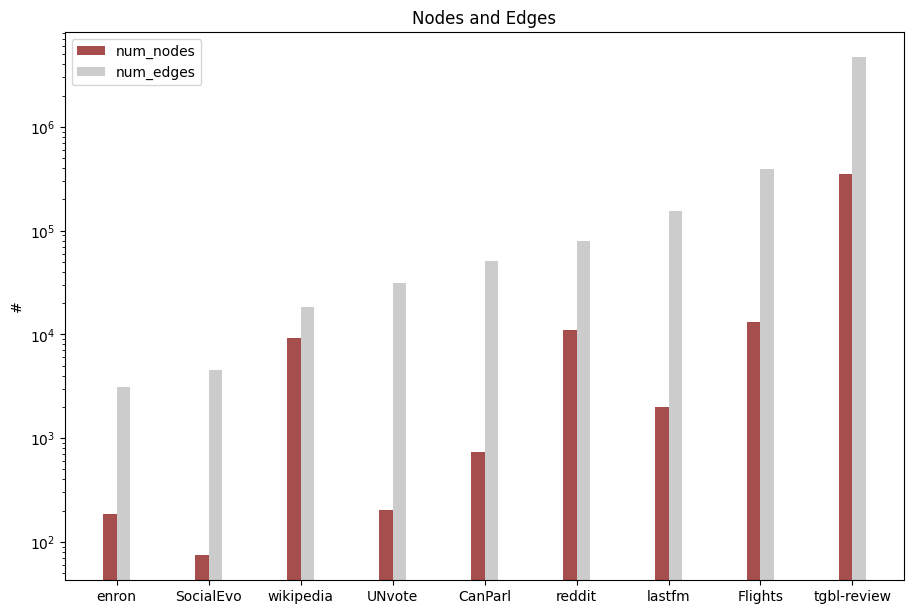

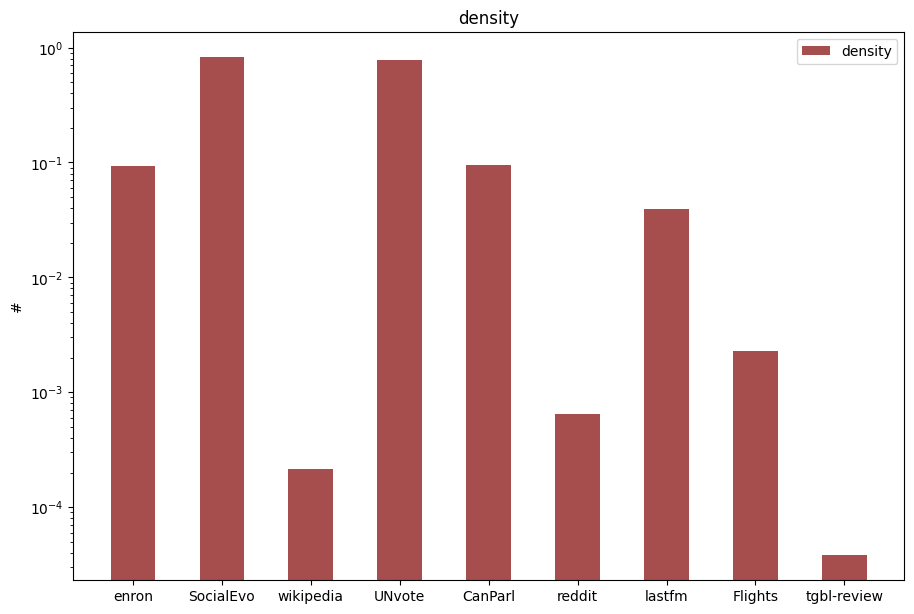

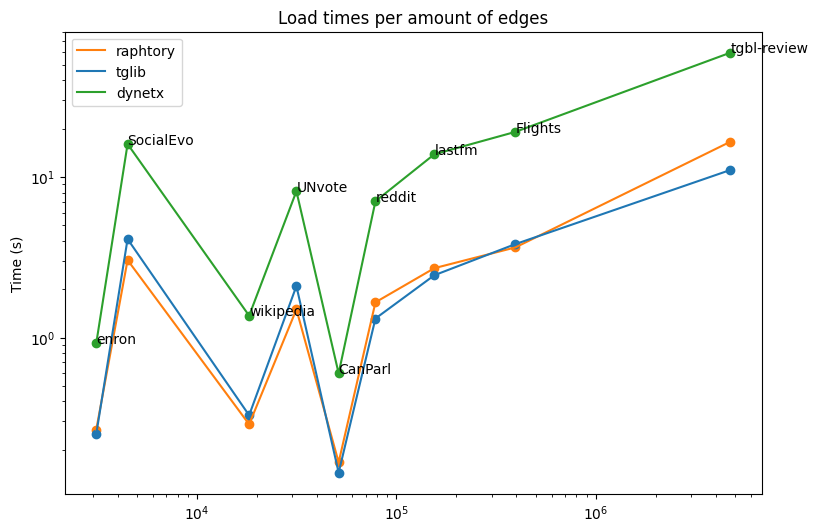

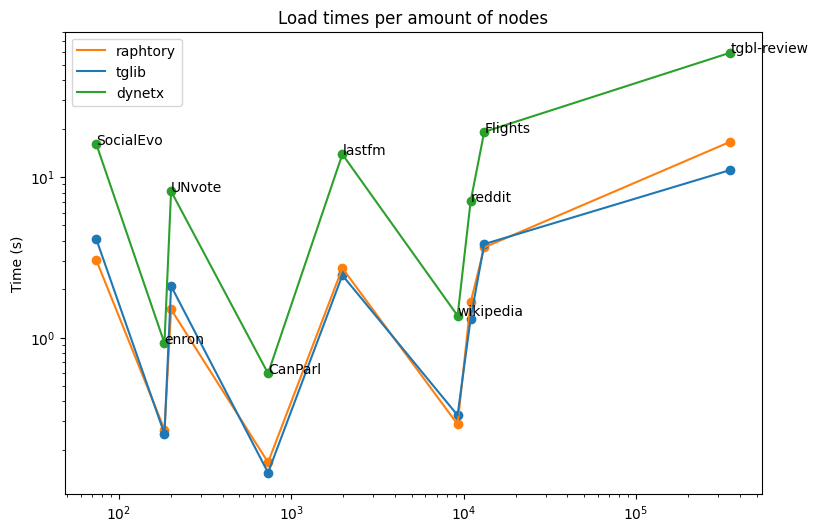

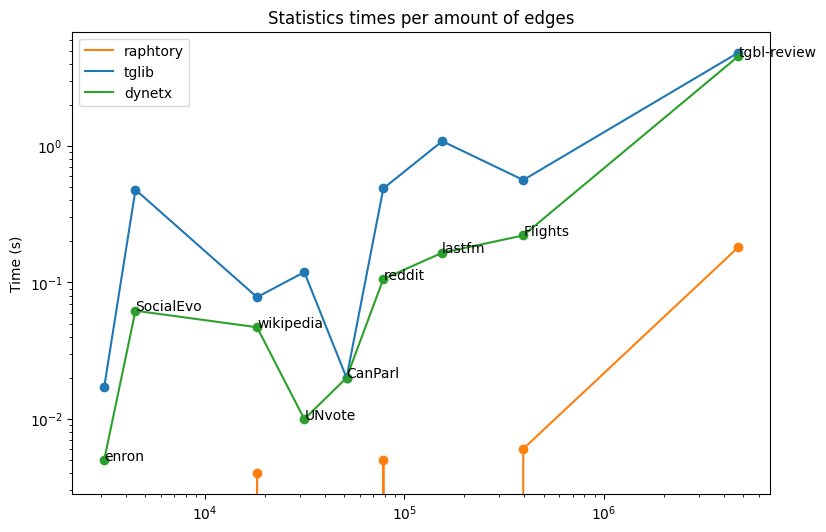

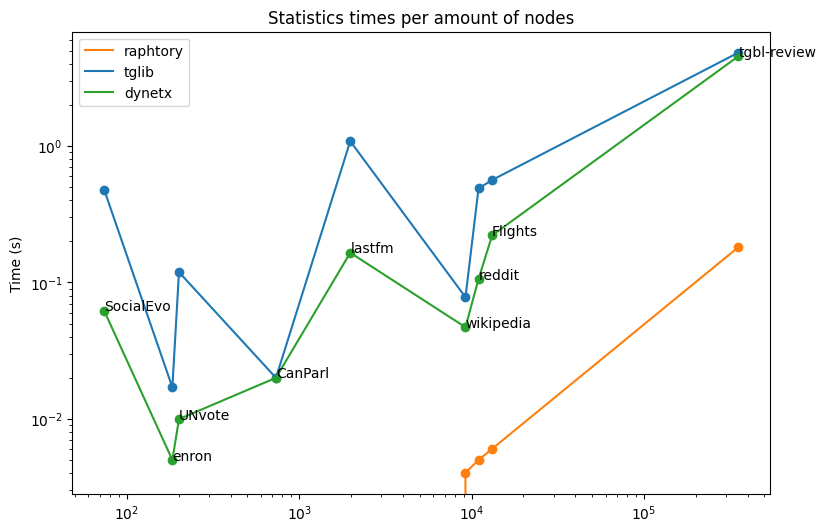

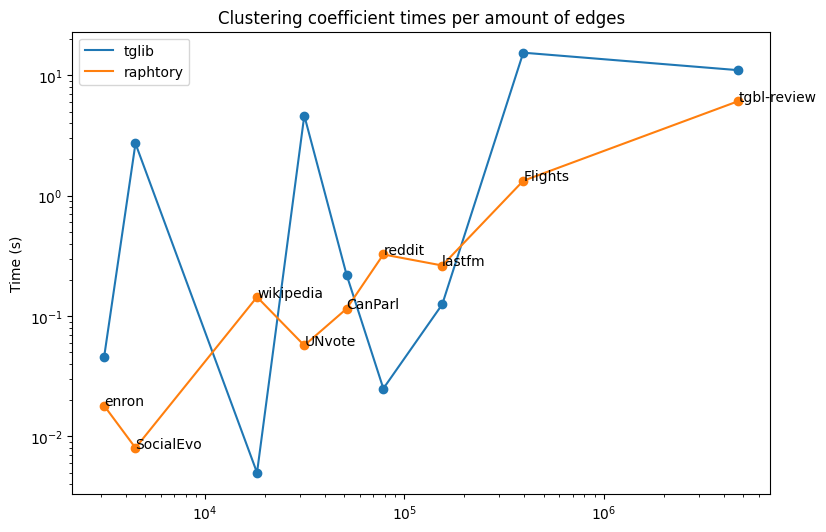

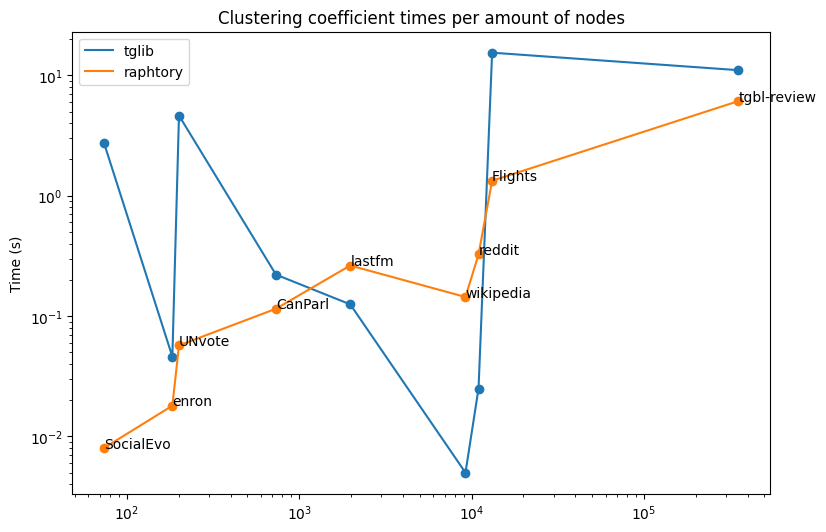

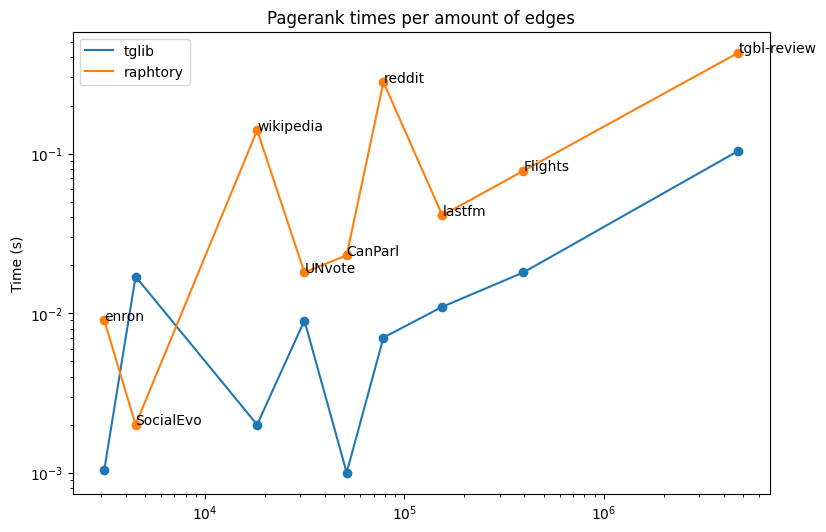

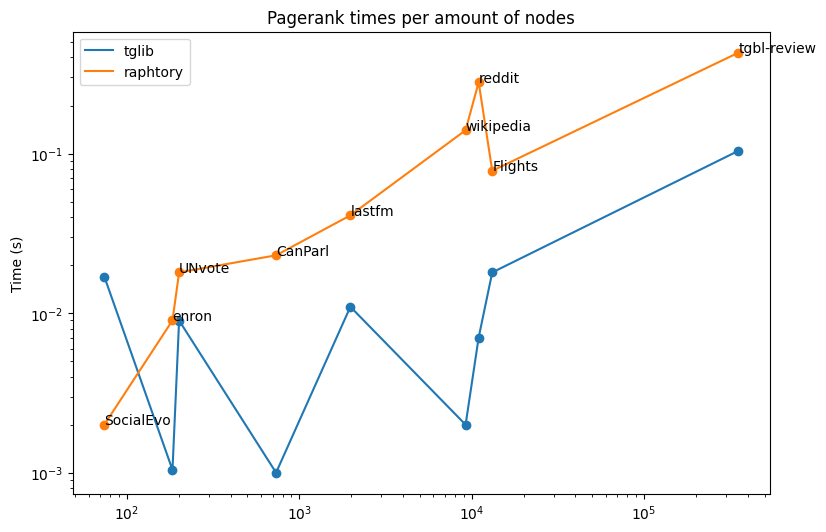

In [ ]:
from plots import BasicPlots as bp

nodes_and_edges = {'num_nodes':num_nodes, 'num_edges':num_edges, 'num_incidents':num_incidents}
datasets = data_sets

bp.plot_basic_3(nodes_and_edges, data_sets, ['num_nodes', 'num_edges', 'num_incidents'], 'Nodes, Edges and Incidents')
bp.plot_basic({'density':density}, data_sets, ['density'], 'density')

# Load Times
structs = ['raphtory', 'tglib', 'dynetx']
# bp.plot_basic_3(load_time_results, data_sets, structs, "Load times")
bp.plot_per_quant(load_time_results, num_edges, data_sets, structs, "Load times per amount of edges")
# bp.plot_per_quant(load_time_results, num_edges, data_sets, structs, "Load times per amount of edges", times_density=True, density = density)
bp.plot_per_quant(load_time_results, num_nodes, data_sets, structs, "Load times per amount of nodes")
# bp.plot_per_quant(load_time_results, num_nodes, data_sets, structs, "Load times density per amount of nodes", times_density=True, density = density)

# Stats Times
# bp.plot_basic_3(stats_time_results, data_sets, structs, "Statistics times")
bp.plot_per_quant(stats_time_results, num_edges, data_sets, structs, "Statistics times per amount of edges")
# bp.plot_per_quant(stats_time_results, num_edges, data_sets, structs, "Statistics times density per amount of edges", times_density=True, density = density)
bp.plot_per_quant(stats_time_results, num_nodes, data_sets, structs, "Statistics times per amount of nodes")
# bp.plot_per_quant(stats_time_results, num_nodes, data_sets, structs, "Statistics times density per amount of nodes", times_density=True, density = density)


# pathing times
# structs = [ 'tglib', 'dynetx']
# bp.plot_basic_2(path_time_results, data_sets, structs, "path times")
# bp.plot_per_quant(path_time_results, num_edges, data_sets, structs, "path times per amount of edges")
# bp.plot_per_quant(path_time_results, num_nodes, data_sets, structs, "path times per amount of nodes")

# cc times
structs = ['tglib', 'raphtory']
# bp.plot_basic_2(cc_time, data_sets, structs, "Clustering coefficient times")
bp.plot_per_quant(cc_time, num_edges, data_sets, structs, "Clustering coefficient times per amount of edges")
# bp.plot_per_quant(cc_time, num_edges, data_sets, structs, "Clustering coefficient times density per amount of edges", times_density=True, density = density)
bp.plot_per_quant(cc_time, num_nodes, data_sets, structs, "Clustering coefficient times per amount of nodes")
# bp.plot_per_quant(cc_time, num_nodes, data_sets, structs, "Clustering coefficient times density per amount of nodes", times_density=True, density = density)


# pagerank times
structs = ['tglib', 'raphtory']
# bp.plot_basic_2(pr_time, data_sets, structs, "Pagerank times")
bp.plot_per_quant(pr_time, num_edges, data_sets, structs, "Pagerank times per amount of edges")
# bp.plot_per_quant(pr_time, num_edges, data_sets, structs, "Pagerank times density per amount of edges", times_density=True, density = density)
bp.plot_per_quant(pr_time, num_nodes, data_sets, structs, "Pagerank times per amount of nodes")
# bp.plot_per_quant(pr_time, num_nodes, data_sets, structs, "Pagerank times density per amount of nodes", times_density=True, density = density)



In [ ]:
# pprint.pprint(pr_time)
pprint.pprint(density)

a1 = [0.016994476318359375, 0.0010409355163574219, 0.010033130645751953, 0.0009987354278564453, 0.010001182556152344, 0.0009927749633789062, 0.0059566497802734375, 0.021994829177856445, 0.09700298309326172]
a1.sort()
print(a1)
a2 = [0.0010409355163574219, 0.016994476318359375, 0.0009927749633789062, 0.010033130645751953, 0.0009987354278564453, 0.0059566497802734375, 0.010001182556152344, 0.021994829177856445, 0.09700298309326172]
a2.sort()
print(a2)


a1 = [0.008999824523925781, 0.0019996166229248047, 0.13899636268615723, 0.01000213623046875, 0.022002458572387695, 0.27500224113464355, 0.04199481010437012, 0.06600046157836914, 0.4649999141693115]
a1.sort()
print(a1)
a2 = [0.0019996166229248047, 0.008999824523925781, 0.01000213623046875, 0.022002458572387695, 0.04199481010437012, 0.13899636268615723, 0.27500224113464355, 0.06600046157836914, 0.4649999141693115]
a2.sort()
print(a2)



{'CanParl': 0.09540688246488571,
 'Flights': 0.0022782618179917336,
 'SocialEvo': 0.830433189868927,
 'UNvote': 0.7839800715446472,
 'enron': 0.09280707687139511,
 'lastfm': 0.03955497220158577,
 'reddit': 0.0006508436053991318,
 'tgbl-review': 3.803882282227278e-05,
 'wikipedia': 0.0002144645113730803}
[0.0009927749633789062, 0.0009987354278564453, 0.0010409355163574219, 0.0059566497802734375, 0.010001182556152344, 0.010033130645751953, 0.016994476318359375, 0.021994829177856445, 0.09700298309326172]
[0.0009927749633789062, 0.0009987354278564453, 0.0010409355163574219, 0.0059566497802734375, 0.010001182556152344, 0.010033130645751953, 0.016994476318359375, 0.021994829177856445, 0.09700298309326172]
[0.0019996166229248047, 0.008999824523925781, 0.01000213623046875, 0.022002458572387695, 0.04199481010437012, 0.06600046157836914, 0.13899636268615723, 0.27500224113464355, 0.4649999141693115]
[0.0019996166229248047, 0.008999824523925781, 0.01000213623046875, 0.022002458572387695, 0.0419948

[('SocialEvo', 74), ('enron', 184), ('UNvote', 201), ('CanParl', 734), ('lastfm', 1980), ('wikipedia', 9227), ('reddit', 10984), ('Flights', 13169), ('tgbl-review', 352637)]
[74, 184, 201, 734, 1980, 9227, 10984, 13169, 352637]
[3.0379700660705566, 0.266984224319458, 1.496997356414795, 0.1669619083404541, 2.704967737197876, 0.2879669666290283, 1.6579618453979492, 3.6429591178894043, 16.588109493255615]
[74, 184, 201, 734, 1980, 9227, 10984, 13169, 352637]
[16.0489182472229, 0.9220352172851562, 8.15399956703186, 0.5980193614959717, 13.857045412063599, 1.3680365085601807, 7.066005229949951, 19.105345726013184, 59.49172353744507]
[74, 184, 201, 734, 1980, 9227, 10984, 13169, 352637]
[4.106600046157837, 0.25099897384643555, 2.0929527282714844, 0.14395952224731445, 2.444002628326416, 0.328000545501709, 1.313999891281128, 3.820068836212158, 11.059909105300903]


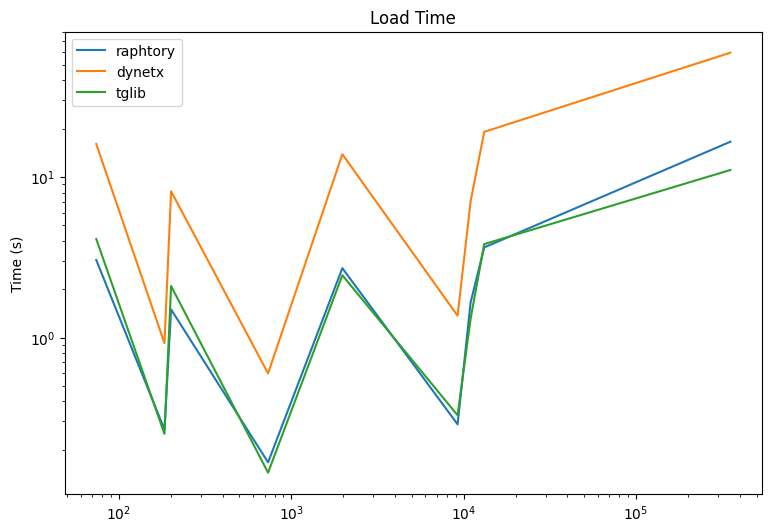

In [ ]:
# pprint.pprint(load_time_results)
memory_results = load_time_results
structs = ['raphtory', 'dynetx', 'tglib']
datasets = data_sets

fig, ax = plt.subplots()
width = 0.15
offset = {'raphtory': -width, 'dynetx': 0, 'tglib': width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'raphtory': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0), 'tglib': (0.8, 0.8, 0.8)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'raphtory': 'Raphtory', 'dynetx': 'DyNetX', 'tglib':'TGLib'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

sorted_nodes = sorted(num_nodes.items(), key=lambda x: x[1])
print(sorted_nodes)
for struct in structs:
    ys = [memory_results[struct][d[0]] for d in sorted_nodes]
    xs = [x[1] for x in sorted_nodes] # [num_edges[d] for d in num_edges]
    print(xs)
    print(ys)
    # ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])
    plt.plot(xs, ys, label = struct)


ax.set_title('Load Time')
# ax.set_xticks(label_location)
# ax.set_xticklabels(datasets)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
# fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(9)
# plt.xticks(rotation=45)
# plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('load time per number of edges.png', format='png')
plt.show()